<a href="https://colab.research.google.com/github/Kykykyk1/-/blob/main/tensorflow%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#  옷이나 신발의 분류하는 신경망 분석

# TensorFlow and tf.keras   , 여기서는 tf.keras를 사용한다
import tensorflow as tf

# Helper libraries
import numpy as np                             #실습에 쓰일 library들
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [42]:
# 이제 MNIST 데이터 베이스를 입력하는데 MNIST란 손으로 쓴 숫자들로 이루어진 대형 데이터 베이스이며 이번 과제에서 사용할 데이터셋은 10개의 category와 70,000개의 흑백 이미지로 구성된 패션MNIST 데이터셋이다.
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # train_은 훈련세트를 나타내고 test는 테스트 세트를 나타냅니다

In [43]:
#나중에 분류를 하고 카테고리를 정해야하기 때문에 클래스 이름을 정해줍니다. 분류는 10가지로 합니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

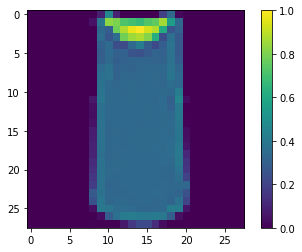

In [47]:
# 데이터 전처리를 하기 전에 훈련세트의 세번째 이미지를 보면
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [45]:
#픽셀 값의 범위가 0~250인 것을 알 수 있다.
#신경망 모델에 주입하기 전에 이 값을 0~1로 바꿔줘야 한다
#테스트 세트랑 훈련세트 모두 이렇게 바꿔준다
train_images = train_images / 255.0

test_images = test_images / 255.0

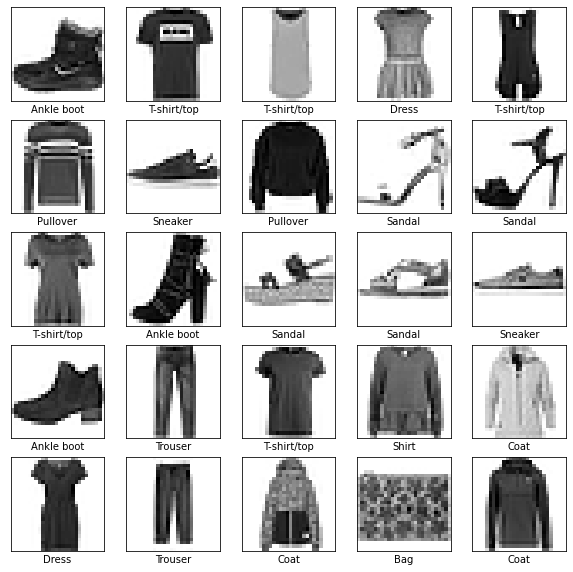

In [48]:
# 처음 25개의 이미지와 클래스 이름을 출력해본다
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [49]:
#모델 구성
#층 설정
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [50]:
#모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [51]:
#모델 훈련
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5021 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3775 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3360 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3129 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2952 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2787 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2573 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2463 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.237

In [52]:
#정확도 평가: 모델이 테스트 데이서 세트에서 작동하는 방식 비교
#loss를 알기 위해서 verbose는 2로 설정한다
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3646 - accuracy: 0.8729 - 624ms/epoch - 2ms/step

Test accuracy: 0.8729000091552734


In [54]:
#예측하기
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

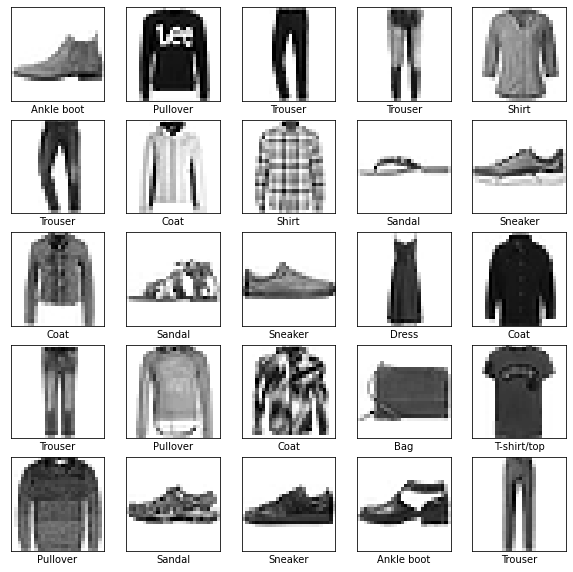

In [56]:
#테스트 값들의 원래 값
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [59]:
predictions[5]
np.argmax(predictions[5])

1

In [61]:
# 이게 맞는지 test_label에서도 값을 확인해본다
test_labels[5]

1

In [62]:
#위에 결과가 모두 1이 나왔으므로 일치한다
#다음으로 예측을 그래프로 표현하면
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

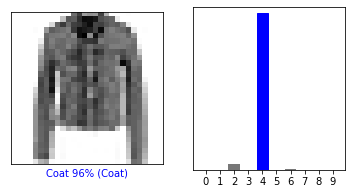

In [65]:
#예측을 그래프로 한번 나타내보자
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

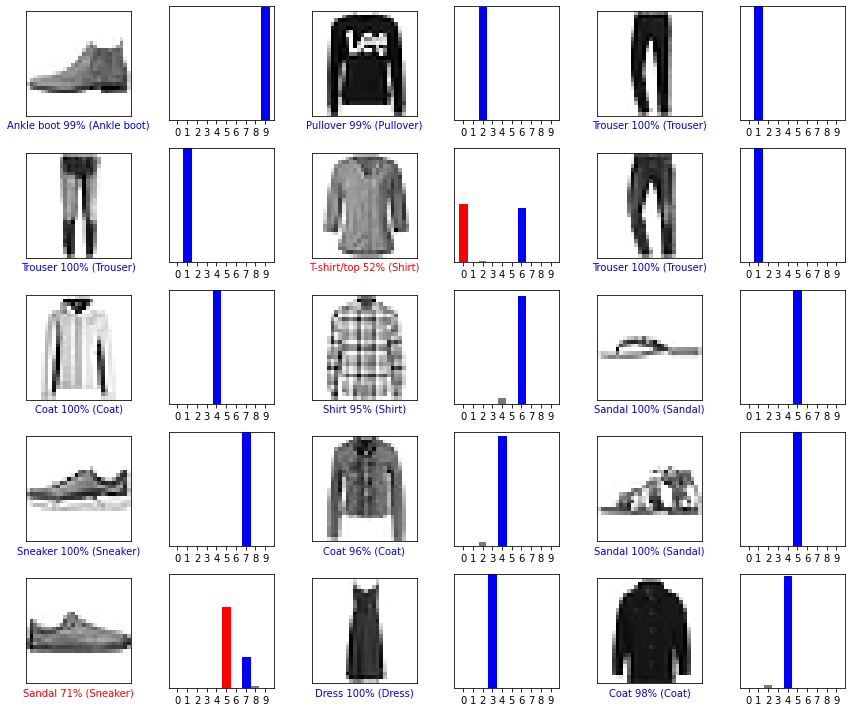

In [66]:
# 다른 이미지들도 해보면
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [67]:
#올바르게 예측되면 파란색이로 잘못 예측되면 빨간색이다
# 신뢰도가 높아도 잘못 예측이 된 경우가 있음을 알 수 있다
#위에서 학습한 모델로 한 이미지의 예측을 해보자
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [68]:
# tf.keras 모델은 묶음 혹은 배치 형태로 예측을 하는데 특화되어있으므로, 2차원 배열로 만들어야 한다
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


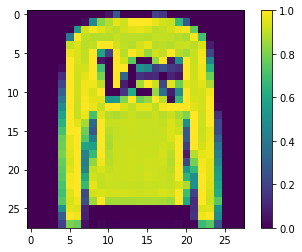

In [82]:
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [83]:
#예측하기
predictions_single = probability_model.predict(img)

print(predictions_single)


[[1.0167491e-05 6.7711120e-13 9.9436063e-01 3.1166562e-11 5.6135766e-03
  2.0908830e-12 1.5683736e-05 4.1985939e-11 5.4036120e-10 8.0163889e-14]]


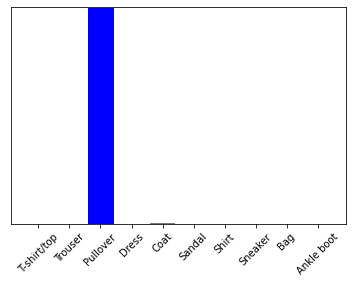

In [84]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [85]:
np.argmax(predictions_single[0])

2